In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

#### 1. 데이터 읽어오기

In [2]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### 2. 기본정보 확인

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### 3. 표준화(수치형 값들만)

In [4]:
num = ['total_bill', 'tip', 'size']

tips[num] = StandardScaler().fit_transform(tips[num])
tips

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,-0.600193
1,-1.063235,-0.969205,Male,No,Sun,Dinner,0.453383
2,0.137780,0.363356,Male,No,Sun,Dinner,0.453383
3,0.438315,0.225754,Male,No,Sun,Dinner,-0.600193
4,0.540745,0.443020,Female,No,Sun,Dinner,1.506958
...,...,...,...,...,...,...,...
239,1.040511,2.115963,Male,No,Sat,Dinner,0.453383
240,0.832275,-0.722971,Female,Yes,Sat,Dinner,-0.600193
241,0.324630,-0.722971,Male,Yes,Sat,Dinner,-0.600193
242,-0.221287,-0.904026,Male,No,Sat,Dinner,-0.600193


#### 4. 범주형 데이터들을 수치형으로 변환

In [ ]:
col = ['sex', 'smoker', 'day', 'time']

for r in col:
    cat = sorted(tips[r].unique())
    tips[r + '_encoded'] = pd.Categorical(tips[r], categories=cat, ordered=True).codes

tips

,total_bill,tip,sex,smoker,day,time,size,sex_encoded,smoker_encoded,day_encoded,time_encoded
0,-0.314711,-1.439947,Female,No,Sun,Dinner,-0.600193,0,0,2,0
1,-1.063235,-0.969205,Male,No,Sun,Dinner,0.453383,1,0,2,0
2,0.137780,0.363356,Male,No,Sun,Dinner,0.453383,1,0,2,0
3,0.438315,0.225754,Male,No,Sun,Dinner,-0.600193,1,0,2,0
4,0.540745,0.443020,Female,No,Sun,Dinner,1.506958,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
239,1.040511,2.115963,Male,No,Sat,Dinner,0.453383,1,0,1,0
240,0.832275,-0.722971,Female,Yes,Sat,Dinner,-0.600193,0,1,1,0
241,0.324630,-0.722971,Male,Yes,Sat,Dinner,-0.600193,1,1,1,0
242,-0.221287,-0.904026,Male,No,Sat,Dinner,-0.600193,1,0,1,0


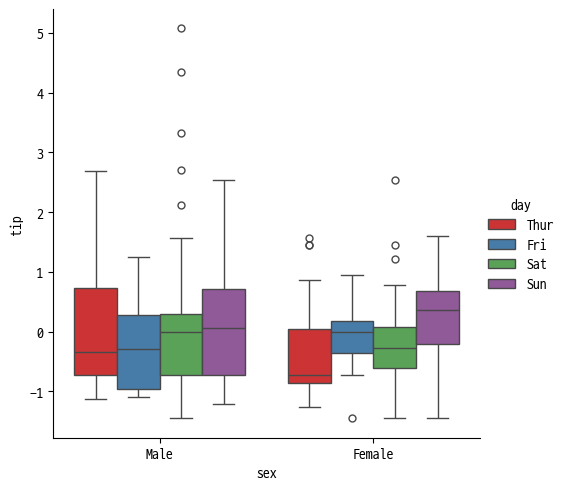

In [13]:
sns.catplot(x = 'sex', y = 'tip', hue = 'day', data = tips, kind = 'box', palette='Set1')

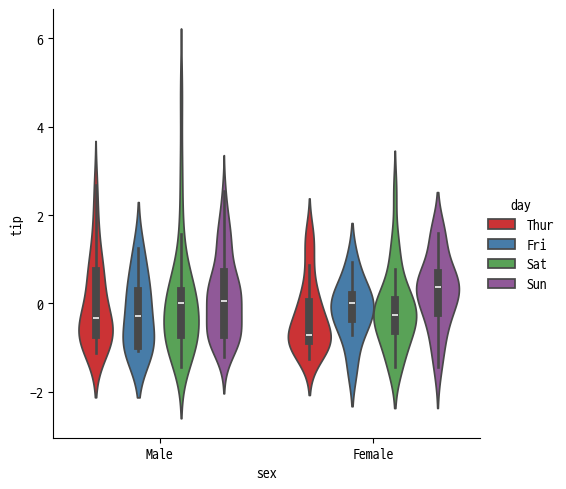

In [14]:
sns.catplot(x = 'sex', y = 'tip', hue = 'day', data = tips, kind = 'violin', palette='Set1')

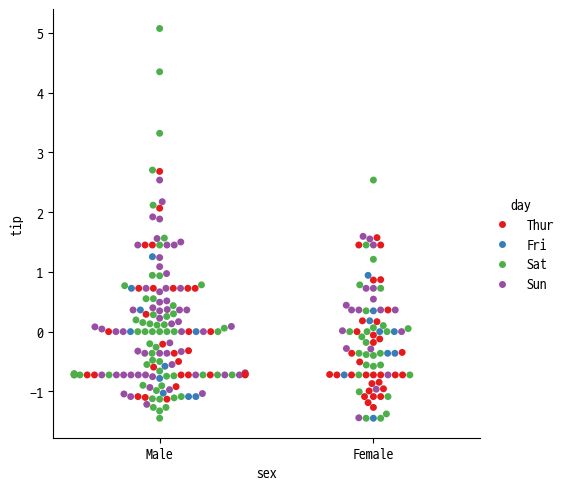

In [15]:
sns.catplot(x = 'sex', y = 'tip', hue = 'day', data = tips, kind = 'swarm', palette='Set1')

#### 5. 상환행렬

In [16]:
numeric_cols = tips.select_dtypes(include=['number'])

corr_matrix = numeric_cols.corr()   
corr_matrix

,total_bill,tip,size,sex_encoded,smoker_encoded,day_encoded,time_encoded
total_bill,1.000000,0.675734,0.598315,0.144877,0.085721,-0.043550,-0.183118
tip,0.675734,1.000000,0.489299,0.088862,0.005929,-0.011548,-0.121629
size,0.598315,0.489299,1.000000,0.086195,-0.133178,0.069510,-0.103411
sex_encoded,0.144877,0.088862,0.086195,1.000000,0.002816,-0.078292,-0.205231
smoker_encoded,0.085721,0.005929,-0.133178,0.002816,1.000000,-0.282721,-0.054921
day_encoded,-0.043550,-0.011548,0.069510,-0.078292,-0.282721,1.000000,0.638019
time_encoded,-0.183118,-0.121629,-0.103411,-0.205231,-0.054921,0.638019,1.000000


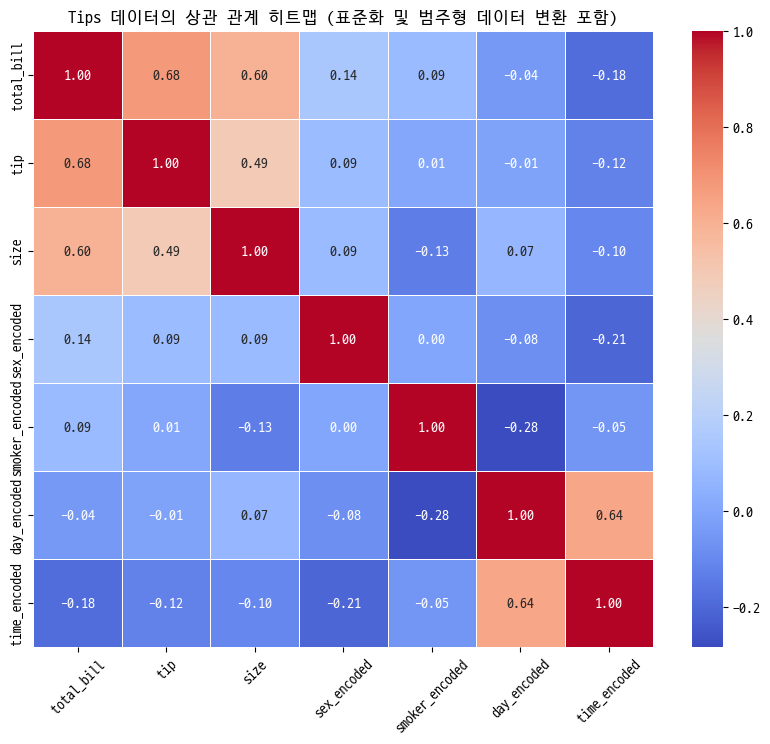

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Tips 데이터의 상관 관계 히트맵 (표준화 및 범주형 데이터 변환 포함)')
plt.xticks(rotation=45)
plt.show()